In [638]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [639]:
data = pd.read_csv(r"Dataset\nifty_500.csv")

In [640]:
data.head()

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.3,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.9,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.4,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84


In [641]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               501 non-null    object 
 1   Symbol                     501 non-null    object 
 2   Industry                   501 non-null    object 
 3   Series                     501 non-null    object 
 4   Open                       501 non-null    float64
 5   High                       501 non-null    float64
 6   Low                        501 non-null    float64
 7   Previous Close             501 non-null    float64
 8   Last Traded Price          501 non-null    float64
 9   Change                     501 non-null    object 
 10  Percentage Change          501 non-null    object 
 11  Share Volume               501 non-null    int64  
 12  Value (Indian Rupee)       501 non-null    float64
 13  52 Week High               501 non-null    float64

In [642]:
data.shape

(501, 17)

In [643]:
data["change"] = pd.to_numeric(data["Change"], errors="coerce")
data["Percentage Change"] = pd.to_numeric(data["Percentage Change"], errors="coerce")

In [644]:
def clean_hypen(data, replace_with = pd.NA):
    data = data.replace("-", replace_with)
    return data

In [645]:
#data = clean_hypen(data, replace_with = pd.NA)

In [646]:
data.isnull().sum()

Company Name                 0
Symbol                       0
Industry                     0
Series                       0
Open                         0
High                         0
Low                          0
Previous Close               0
Last Traded Price            0
Change                       0
Percentage Change            3
Share Volume                 0
Value (Indian Rupee)         0
52 Week High                 0
52 Week Low                  0
365 Day Percentage Change    2
30 Day Percentage Change     1
change                       5
dtype: int64

In [647]:
cols_to_scale = ["Change","Percentage Change", "365 Day Percentage Change", "30 Day Percentage Change"]

data[cols_to_scale] = data[cols_to_scale].apply(pd.to_numeric, errors="coerce")

mean_values = data[cols_to_scale].mean()

In [648]:
print(mean_values)

Change                       4.592238
Percentage Change            0.387169
365 Day Percentage Change   -7.145434
30 Day Percentage Change    -6.726460
dtype: float64


In [649]:
data.fillna(mean_values,inplace=True)

In [650]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ["Change","Percentage Change", "365 Day Percentage Change", "30 Day Percentage Change"]
scaler = StandardScaler()

data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [651]:
data['Industry'].unique()

array(['Diversified', 'Healthcare', 'Financial Services', 'Capital Goods',
       'Consumer Services', 'Construction Materials', 'Metals & Mining',
       'Power', 'Services', 'Fast Moving Consumer Goods',
       'Oil Gas & Consumable Fuels', 'Information Technology',
       'Chemicals', 'Textiles', 'Automobile and Auto Components',
       'Consumer Durables', 'Telecommunication', 'Realty',
       'Forest Materials', 'Construction',
       'Media Entertainment & Publication'], dtype=object)

In [652]:
data['Series'].unique()

array(['EQ', 'BE'], dtype=object)

In [653]:
data['Industry'].value_counts()    

Industry
Financial Services                   88
Healthcare                           52
Capital Goods                        48
Chemicals                            38
Fast Moving Consumer Goods           33
Information Technology               29
Consumer Durables                    28
Automobile and Auto Components       27
Consumer Services                    24
Services                             21
Oil Gas & Consumable Fuels           17
Construction                         14
Metals & Mining                      14
Construction Materials               13
Power                                11
Realty                               11
Telecommunication                    10
Textiles                             10
Media Entertainment & Publication     9
Diversified                           2
Forest Materials                      2
Name: count, dtype: int64

In [654]:
print("Before Encoding:", data.columns)


Before Encoding: Index(['Company Name', 'Symbol', 'Industry', 'Series', 'Open', 'High', 'Low',
       'Previous Close', 'Last Traded Price', 'Change', 'Percentage Change',
       'Share Volume', 'Value (Indian Rupee)', '52 Week High', '52 Week Low',
       '365 Day Percentage Change', '30 Day Percentage Change', 'change'],
      dtype='object')


In [655]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(dtype=int,sparse_output=False)

encoded_features = encoder.fit_transform(data[['Series', 'Industry']])

encoded_data = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Series', 'Industry']))
data = data.drop(['Series', 'Industry'], axis=1)
data_merged = pd.concat([data, encoded_data], axis=1)


MODEL TRAINING

In [656]:
from sklearn.model_selection import train_test_split

features = [
    "Open", "High", "Low", "Previous Close", "Change", "Percentage Change",
    "52 Week High", "52 Week Low", "365 Day Percentage Change", 
    "30 Day Percentage Change", "Share Volume", "Value (Indian Rupee)"
]
target = "Last Traded Price"

X = data_merged[features]
y = data_merged[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Linear regression model

In [657]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [658]:
y_pred = model.predict(X_test)

In [659]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 677.1108853969563
R^2 Score: 0.9999520922776908


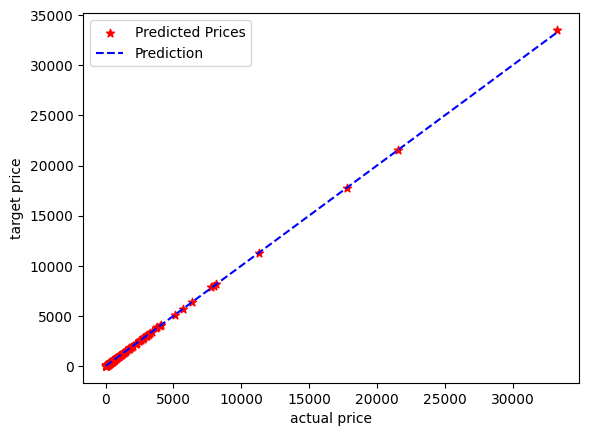

In [660]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='red', marker='*', label='Predicted Prices')
plt.xlabel('actual price')
plt.ylabel('target price')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', label='Prediction')

plt.legend()
plt.show()

SVM Classification

In [661]:
data_merged['Percentage Change'] = pd.to_numeric(data_merged['Percentage Change'], errors='coerce')

data_merged['Target'] = np.where(data_merged['Percentage Change'] >= 0, 1, 0)

In [662]:
from sklearn.model_selection import train_test_split

features = [
    "Open", "High", "Low", "Previous Close", "Change", "Percentage Change",
    "52 Week High", "52 Week Low", "365 Day Percentage Change", 
    "30 Day Percentage Change", "Share Volume", "Value (Indian Rupee)"
]
target = "Last Traded Price"

X = data_merged[features]
y = data_merged[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [663]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, precision_score, recall_score, f1_score

svm_model = SVR()
svm_model = svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [664]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 30541164.76581448
R^2 Score: -0.04857007641371536
